## How to Use

1. Run the job with `-B <rate>`.
2. Create `bags.csv` by running the following command in the log directory:
```
r2t2/scripts/parse_worker_info.py -i . -t BAG -o bags.csv
```

**Make sure** you have `numpy`, `matplotlib` and `pandas` installed.

In [4]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

plt.rcParams['figure.figsize'] = 12, 10
plt.rcParams.update({'font.size': 16})
pd.options.display.max_rows = 20

def show_more(d, lines):
    save = pd.options.display.max_rows
    pd.options.display.max_rows = lines
    display(d)
    pd.options.display.max_rows = save
    
def show_all(d):
    return show_more(d, len(d))

def read_data(path):
    data = pd.read_csv(path, dtype={'bag': object})
    min_timestamp = min(data.timestamp)
    data['timestamp_ms'] = data.timestamp - min_timestamp
    del data['timestamp']
    return data

def show_bag(data, bag_id):
    p = (data[data.bag == bag_id]       
        .sort_values(by=['timestamp_ms'])).reset_index(drop=True)
    
    #def highlighter(x):
    #    return ['background-color: rgba(255, 255, 255, 0.1)' if (x.hop % 2 == 0) else '' for y in x]
    
    #q = p.style.apply(highlighter, axis=1)
    show_more(p, len(p))

In [65]:
bags = read_data("/mnt/data/bags2.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


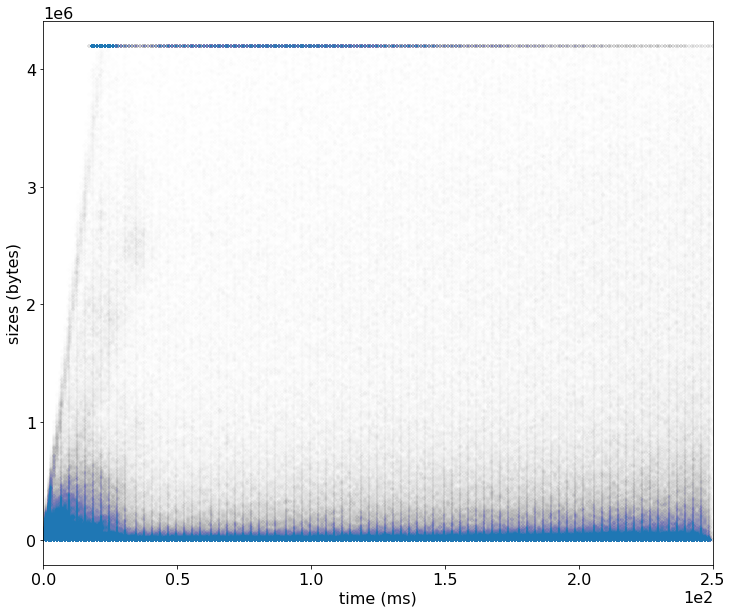

In [62]:
def time_to_finish(x):
    a = x.to_numpy()
    if len(a) < 2:
        return None
    return a[1] - a[0]

d = (bags[bags.action.isin(["Created", "Sealed", "Submitted"])]
         .sort_values(by=['timestamp_ms'])
         .groupby("bag")
         .agg({'timestamp_ms': time_to_finish, 'size': 'max'}))

sizes = d['size'].to_numpy()
times = d.timestamp_ms.to_numpy()

plt.scatter(times, sizes, marker='+', alpha=0.005, s=10)
plt.xlim(0,250)
plt.gcf().set_facecolor('white')
plt.ylabel('sizes (bytes)')
plt.xlabel('time (ms)')
plt.axes().ticklabel_format(scilimits=(0,0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


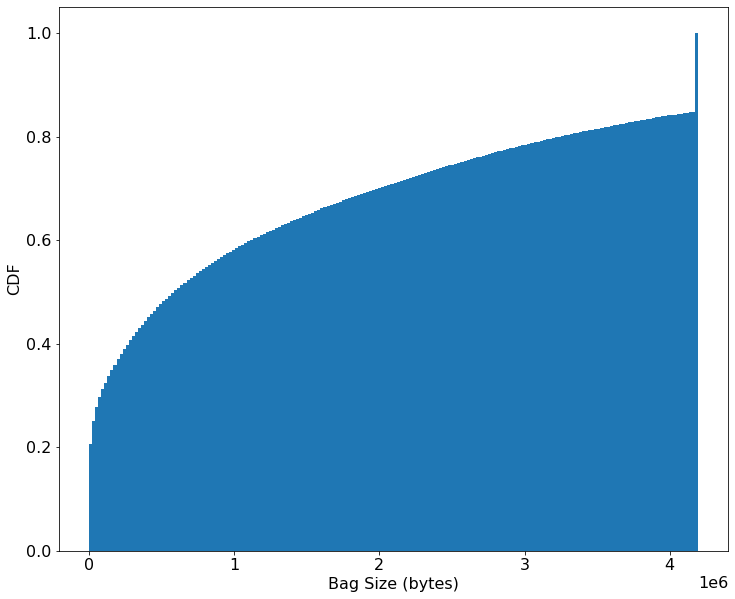

In [61]:
plt.hist(bags[bags.bag.str.contains("T0/")].groupby("bag").agg({'size': 'max'}).to_numpy(),
         density=True, cumulative=True, bins=200)
plt.gcf().set_facecolor('white')
plt.xlabel('Bag Size (bytes)')
plt.ylabel('CDF')
plt.axes().ticklabel_format(scilimits=(0,0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


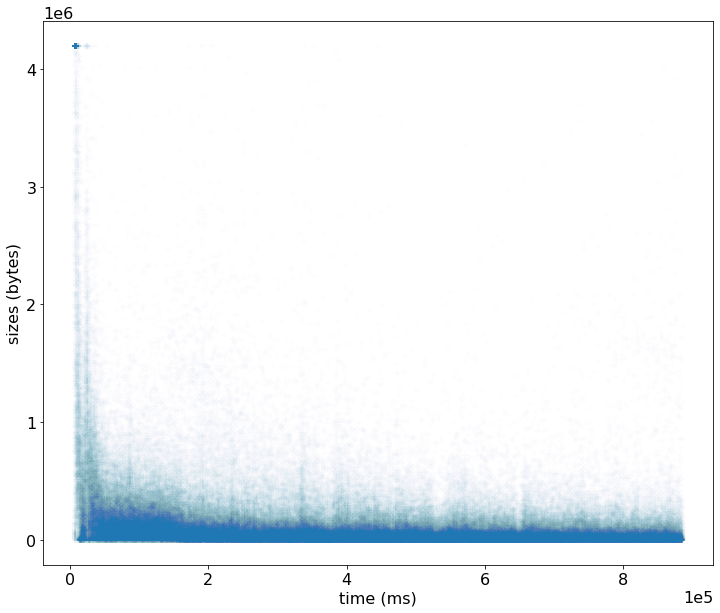

In [66]:
d = (bags[bags.action.isin(["Submitted"]) & bags.bag.str.contains("T0/")]
         .sort_values(by=['timestamp_ms'])
         .groupby("bag")
         .agg({'timestamp_ms': 'max', 'size': 'max'}))

sizes = d['size'].to_numpy()
times = d.timestamp_ms.to_numpy()

plt.gcf().set_facecolor('white')
plt.scatter(times, sizes, alpha=0.01, marker='+')
plt.ylabel('sizes (bytes)')
plt.xlabel('time (ms)')
plt.axes().ticklabel_format(scilimits=(0,0))

In [60]:
bags

,bag,workerId,count,size,action,timestamp_ms
0,T3/W777/B0,1000,1239,327516,Requested,3961
1,T3/W777/B0,1000,1239,327516,Dequeued,3978
2,T3/W777/B0,1000,1239,327516,Opened,3979
3,T0/W1000/B0,1000,0,0,Created,6199
4,T0/W1000/B0,1000,1239,313094,Submitted,6201
5,T3/W799/B0,1000,455,114952,Requested,6201
6,T3/W779/B0,1000,206,54527,Requested,6201
7,T3/W642/B0,1000,2432,655300,Requested,6201
8,T3/W832/B0,1000,2137,581397,Requested,6201
9,T3/W557/B0,1000,427,112385,Requested,6201
